In [1]:
from handout import create_augmented_dataset, train, evaluate, CIFAR10Classifier
from visualize import show_loss_curve, show_image_grid
from torch.utils.data import Subset, DataLoader
from torchvision import transforms
import torch

In [15]:
CLASSES = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

train_data = create_augmented_dataset(train=True)
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

test_data = create_augmented_dataset(train=False)
test_dataloader = DataLoader(test_data, batch_size=36, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [27]:
# model = CIFAR10Classifier()
# model.summary()

# history = train(model=model, dataloader=train_dataloader, epochs=10)
# show_loss_curve(history)

model = torch.load("model.pt")

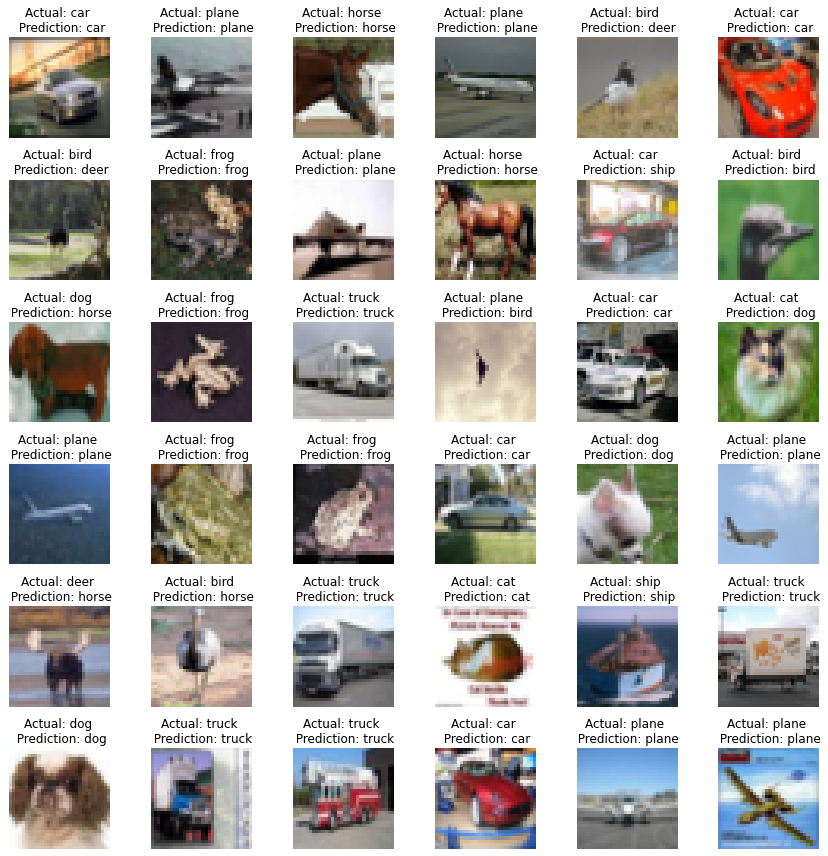

In [28]:
test_iterator = iter(test_dataloader)
images, labels = next(test_iterator)

with torch.no_grad():
    predictions = model(images)
    predictions_as_labels = torch.argmax(predictions, 1)

    show_image_grid(images, labels, predictions_as_labels)

In [18]:
print(f"Accuracy: {evaluate(model, test_dataloader)}")

"model_07-06-22_14-23"

Accuracy: 0.7007


In [19]:
from PIL import Image

class CustomTestDataset():
    def __init__(self):
        self.labels = torch.Tensor([1, 1, 1]).int()

        self.images = torch.empty((3, 3, 32, 32))
        for i, path in enumerate(["test_image1.jpg", "test_image2.jpg", "test_image3.jpg"]):
            test_image = Image.open(path)
            transform = transforms.ToTensor()
            test_image = transform(test_image).unsqueeze(0)
            self.images[i] = test_image

    def __getitem__(self, index):
        return self.images[index], self.labels[index]

    def __len__(self):
        return len(self.images)

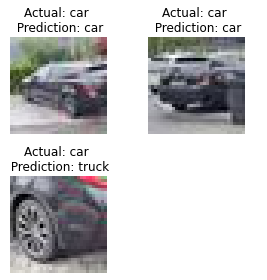

In [21]:
custom_data = CustomTestDataset()

with torch.no_grad():
    predictions = model(custom_data.images)
    predictions_as_labels = torch.argmax(predictions, 1)

    show_image_grid(custom_data.images, custom_data.labels, predictions_as_labels)
